In [28]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dl-course-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F829369%2F1480608%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241004%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241004T153733Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da12ed8c9a080d345fa87da4f769b924282e4fa0b8984e07dc777566bf7a0e7f30f65493a1bbb4b59e430239df40b19c7e1742704bcaedbc43beff285caee73646469d829c27fc5d7f8afe10d34ef20efd0ab4db765ef3f04ab65d4a03742838e0a25a0afc50ab0f3fdf08e91155ab0d20468c7500c1b53c096e4254e1a6c1bd8f1fff3f4292e4fda15fd7d6ad6758b274c62cd6b1224d3ec731f06bf0f04b6a6d04743804f4afef3f38eb6a88402b2fd53dbf39ec56f51537dc0efcd30edc894dc780e7d67425f5168cdad928309b8b5a0d1f9feeda78a9b4a458274825914b0cde9682a2a30afe2f04490c66f314e3183a815c912aa421c7cdc2d606640332e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 242157006 bytes downloaded
Downloaded and uncompressed: dl-course-data
Data source import complete.


# 1. A Single Neuron

## Welcome to Deep Learning!
learn how to:
- create a fully-connected neural network architecture
- apply neural nets to two classic ML problems: regression and classification
- train neural nets with stochastic gradient descent, and
- improve performance with dropout, batch normalization, and other techniques

## What is Deep Learning?

 **Deep learning** : an approach to machine learning characterized by deep stacks of computations.
 - depth of computation enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

**neural networks** : defining model of deep learning  
- composed of neurons(each neuron individually performs only a simple computation)
- power of a neural network comes instead from the complexity of the connections these neurons can form

## The Linear Unit

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/mfOlDR6.png" width=200>
</figure>

- input `x`
- connection to the neuron with **weight** `w`
- multiply the value by the connection's weight: `w * x`
- a neural network "learns" by modifying its weights

- **bias** `b` : a special kind of weight that doesn't have any input data associated with it
    - enables the neuron to modify the output independently of its inputs

- neuron output : `y`
    - the neuron sums up all the values it receives through its connections
    - this neuron's activation : `y = w * x + b` (equation of a line)

## Example - The Linear Unit as a Model

- Single neuron models = *linear* models

- dataset: [80 Cereals](https://www.kaggle.com/crawford/80-cereals)
- input: `'sugars'` (grams of sugars per serving)
- output: `'calories'` (calories per serving)
- bias: `b=90`, weight: `w=2.5`

- estimate the calorie content of a cereal with 5 grams of sugar per serving:
<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/yjsfFvY.png" width=600>
</figure>

- check -> $calories = 2.5 \times 5 + 90 = 102.5$

## Multiple Inputs

- add more input connections to the neuron, one for each additional feature
- multiply each input to its connection weight and then add them all together

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/vyXSnlZ.png" width=200>
</figure>

- formula : $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$.
- a linear unit with two inputs -> plane, a unit with more inputs -> hyperplane

## Linear Units in Keras

 `keras.Sequential`: creates a neural network as a stack of *layers*

- define a linear model
    - input features : (`'sugars'`, `'fiber'`,`'protein'`)
    - output : (`'calories'`)

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


`units`: how many outputs we want
- just predicting `'calories'`, so we'll use `units=1`.

`input_shape`: the dimensions of the inputs
- `input_shape=[3]` : the model will accept three features as input (`'sugars'`, `'fiber'`, and `'protein'`).

- Why is `input_shape` a Python list?

the data is a tabular data(ex.Pandas dataframe)
-> one input for each feature in the dataset
- features are arranged by column, so we'll always have `input_shape=[num_columns]`.

- to permit use of more complex datasets
ex) Image data, for instance, might need three dimensions: `[height, width, channels]`.


# 2. Deep Neural Networks

## Introduction

*modularity* : building up a complex network from simpler functional units

## Layers

Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense layer**.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/2MA4iMV.png" width=200>
</figure>

- each layer : performing relatively simple transformation
- deep stack of layers -> can transform its inputs in more and more complex ways

### Many Kinds of Layers
"layer": any kind of <em>data transformation</em>
- convolutional & recurrent layers : transform data through use of neurons and differ primarily in the pattern of connections they form
- Others : used for feature engineering or simple arithmetic

## The Activation Function

- two dense layers with nothing in between are no better than a single dense layer by itself
- Dense layers by themselves can never move us out of the world of lines and planes ->  need something *nonlinear* -> `activation functions`

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/OLSUEYT.png" width=400>
</figure>

**activation function** : function we apply to each of a layer's outputs (its *activations*)
- The most common is the *rectifier* function $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/aeIyAlF.png" width=400>
</figure>

- the `rectifier function`:  the negative part "rectified" to zero.
- the function will put a *bend* in the data, moving us away from simple lines

- rectifier + linear unit = **rectified linear unit** or **ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".)  
- the output when applying a ReLU activation : `max(0, w * x + b)`

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eFry7Yu.png" width=200>
</figure>

## Stacking Dense Layers

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Y5iwFQZ.png" width=400>
</figure>

**hidden layers** : the layers before the output layer

Now, notice that
the output layer : linear unit (no activation function)
-> makes this network appropriate to a regression task.
*Other tasks (like classification) might require an activation function on the output*

## Building Sequential Models

`Sequential` model : connect together a list of layers in order from first to last
- the first layer : gets the input
- the last layer : produces the output

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

- pass all the layers together in a list instead of as separate arguments
    - ex: `[layer, layer, layer, ...]`

# 3. Stochastic Gradient Descent

## SGD: Stochastic Gradient Descent
- **stochastic** : determined by chance
the minibatches are random samples from the dataset
- **gradient descent** : uses the gradient(a vector that tells us how to change the weights to make the loss change fastest) to descend the loss curve towards a minimum

## Introduction
- training data consists of some features (the inputs) together with an expected target (the output)
- training the network = adjusting weights in such a way that it can transform the features into the target
- weights must represent in some way the relationship between those features and that target as expressed in the training data

In addition to the training data:
- `loss function` : measures how good the network's predictions
- `optimizer` : tell the network how to change its weights.

## The Loss Function

- **loss function**
    - tell a network *what* problem to solve
    - measures the disparity between the the target's true value and the model's predicted value
    - the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better) during training
    - ex) mean-squared error (MSE), the Huber loss

- Different problems call for different loss functions
    - **regression** problems: the task is to predict some numerical value

- **mean absolute error**(**MAE**) : `abs(y_true - y_pred)`.

- total MAE loss: the mean of all MAEs

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/VDcvkZN.png" width=400>
</figure>


## The Optimizer - Stochastic Gradient Descent

- **optimizer**
    - an algorithm that adjusts the weights to minimize the loss
    - say *how* to solve the problem to the network

- **stochastic gradient descent**
    - virtually all of the optimization algorithms used in deep learning
    - iterative algorithms that train a network in steps
        - one **step**:
            1. Sample some training data and run it through the network to make predictions.
            2. Measure the loss between the predictions and the true values.
            3. Finally, adjust the weights in a direction that makes the loss smaller.
- **minibatch** (or "batch"): each iteration's sample of training data

- **epoch** : complete round of the training data. how many times the network will see each training example

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/rFI1tIk.gif" width=400>
</figure>

- pale red dots = the entire training set, solid red dots = the minibatches

- every time SGD sees a new minibatch, shifts the weights toward their correct values on that batch
- the line eventually converges to its best fit; the loss gets smaller as the weights get closer to their true values

## Learning Rate and Batch Size

- **learning rate** : determines the size of the shifts
    - smaller learning rate = the network needs to see more minibatches before its weights converge to their best values

- the two parameters that have the largest effect on how the SGD training proceeds : learning rate & minibatch size

for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results -> use Adam

- **Adam** :  SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense) -> great general-purpose optimizer.

## Adding the Loss and Optimizer

add a loss function and optimizer with the model's `compile` method:

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

## Example - Red Wine Quality

- dataset consists of :
    - physiochemical measurements from about 1600 Portuguese red wines
    - a quality rating for each wine from blind taste-tests

How well can we predict a wine's perceived quality from these measurements?

In [31]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [32]:
# number of input features
print(X_train.shape)

(1119, 11)


In [33]:
from tensorflow import keras
from tensorflow.keras import layers

# defining the model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

# compile the optimizer and the loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# train
# batch_size=256 : feed the optimizer 256 rows of the training data at a time
# epochs=10 : do that 10 times all the way through the dataset
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.3314 - val_loss: 0.1319
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1371 - val_loss: 0.1230
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1288 - val_loss: 0.1238
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1223 - val_loss: 0.1137
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1162 - val_loss: 0.1225
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1172 - val_loss: 0.1085
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1150 - val_loss: 0.1153
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1080 - val_loss: 0.1044
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1093 - val_loss: 0.1051
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1035 - val_loss: 0.1001


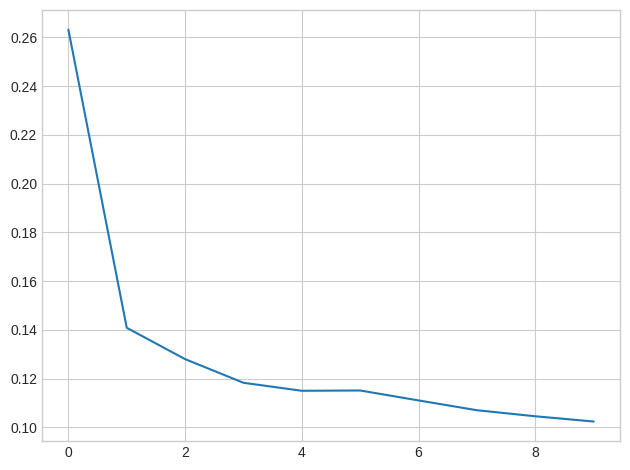

In [35]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

the horizontal loss curve : the model has learned all(no additional epochs)

# 4. Overfitting and Underfitting

## Introduction

 *how to interpret these learning curves* and *how we can use them to guide model development* ?

 => evidence of **underfitting** and **overfitting**

## Interpreting the Learning Curves

- **signal** : the part that generalizes, the part that can help our model make predictions from new data
- **noise** : all of the random fluctuation that comes from data in the real-world or all of the incidental, non-informative patterns that can't actually help the model make predictions -> not useful

- **validation** data : data to accurately assess a model's performance

- **learning curves** : the loss on the training set epoch by epoch and validation data plotted

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/tHiVFnM.png" width=400>
</figure>

- the training loss : go down either when the model learns signal or when it learns noise.
- the validation loss : go down only when the model learns signal

1.  when a model learns signal both curves go down
2.  when it learns noise a **gap**(*size tells you how much noise the model has learned*) is created in the curves

- can get the model to learn more signal at the cost of learning more noise
- the validation loss will continue to decrease & after a certain point, begins to rise

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eUF6mfo.png" width=400>
</figure>

This trade-off indicates that there can be two problems that occur when training a model: not enough signal or too much noise.
- **Underfitting** : the training set is when the loss is not as low as it could be because the model hasn't learned enough *signal*
- **Overfitting** : the training set is when the loss is not as low as it could be because the model learned too much *noise*.


## Capacity

**capacity** : the size and complexity of the patterns it is able to learn
- this will largely be determined by how many neurons it has and how they are connected together
- underfitting -> try increasing its capacity

increasing the capacity of a network:
- *wider* : more units to existing layers. easier learning more linear relationships
- *deeper* : adding more layers. prefer more nonlinear ones

```
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```

## Early Stopping

**early stopping** : stop the training whenever it seems the validation loss isn't decreasing anymore

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eP0gppr.png" width=400>
</figure>

1. when the validation loss rising again has detected
2. reset the weights back to where the minimum occured
3. the model won't continue to learn noise and overfit the data

- Training with early stopping = in less danger of stopping the training before the network has finished learning signal
- early stopping can also *prevent overfitting & underfitting* from not training long enough
- set your training epochs to some large number with early stopping

## Adding Early Stopping ##

can include early stopping through a callback
- **callback** : a function you want run every so often while the network trains
    - early stopping callback : run after every epoch

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

if there hasn't been at least an improvement of 0.001 in the validation loss over the previous 20 epochs

-> stop the training and keep the best model you found

## Example - Train a Model with Early Stopping

increase the capacity & add an early-stopping callback to prevent overfitting

In [37]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.09200409054756165


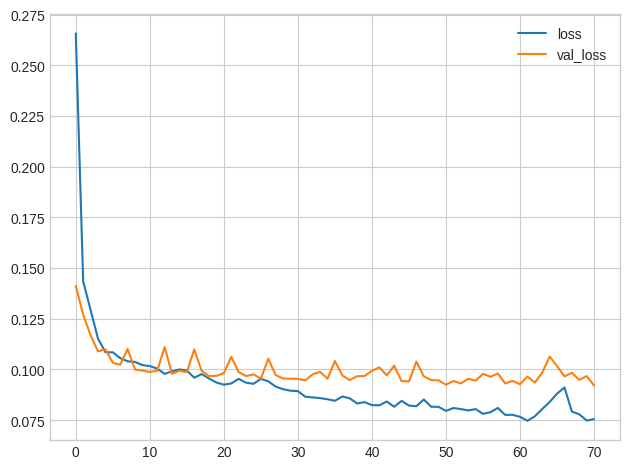

In [38]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500, # large number of epochs
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# 5. Dropout and Batch Normalization

## Introduction

learn a two kinds of special layers, that add some functionality that can sometimes benefit a model in various ways

## Dropout
- a network will often rely on very a specific combinations of weight to recognize spurious patterns
- so specific, they tend to be fragile: remove one and the conspiracy falls apart


`dropout layer` : help correct overfitting
- to break up these conspiracies, we randomly *drop out* some fraction of a layer's input units every step of training
- much harder for the network to learn those spurious patterns in the training data
- has to search for broad, general patterns, whose weight patterns tend to be more robust

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/a86utxY.gif" width=400>
</figure>

dropout = creating a kind of *ensemble* of networks
- the predictions will be made by a committee of smaller networks
- individuals in the committee tend to make different kinds of mistakes, but be right at the same time, making the committee as a whole better than any individual.

## Adding Dropout

`rate`: the dropout rate argument. defines the percentage of the input units to shut off

```
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
```

## Batch Normalization

`batch normalization` (`batchnorm`) : help correct training that is slow or unstable

With neural networks, it's generally a good idea to put all of your data on a common scale
- reason: SGD will shift the network weights in proportion to how large an activation the data produces. features that tend to produce activations of very different sizes can make for unstable training behavior

**batch normalization layer**: normalizing inside the network
1.  normalizing the batch with its own mean and standard deviation
2.  putting the data on a new scale with two trainable rescaling parameters

- performs a kind of coordinated rescaling of its inputs
- added as an aid to the optimization process (though it can sometimes also help prediction performance)
- models with batchnorm
    - tend to need fewer epochs to complete training   
- can fix problems that can cause the training to get "stuck"(consider adding them when having trouble training)

## Adding Batch Normalization

can put batch normalization after a layer

```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

... or between a layer and its activation function:

```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

if adding at the first layer of your network = adaptive preprocessor like Sci-Kit Learn's `StandardScaler`.

## Example - Using Dropout and Batch Normalization

- increase the capacity even more
- add dropout to control overfitting
- add batch normalization to speed up optimization

In [39]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

<ipython-input-39-869ec6321b71>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


adding dropout may need you to increase the number of units in your `Dense` layers

In [40]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


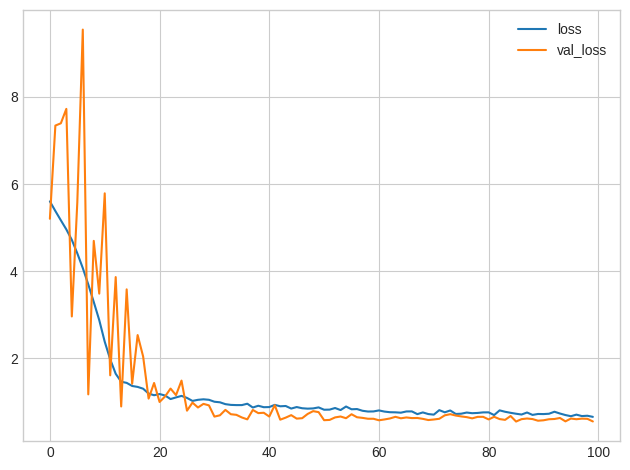

In [41]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

shows how effective batch normalization can be on more difficult datasets

# 6. Binary Classification

## Introduction

apply neural networks to another common machine learning problem: classification
- main difference is in the loss function we use and in what kind of outputs we want the final layer to produce

## Binary Classification

**binary classification** : classification into one of two classes

**class label** : 0 and 1(assigning numeric labels puts the data in a form a neural network can use)

## Accuracy and Cross-Entropy

**Accuracy** : the ratio of correct predictions to total predictions: `accuracy = number_correct / total`

- when all else being equal, accuracy is a reasonable metric to use whenever *the classes in the dataset occur with about the same frequency*

- can't be used as a loss function
    - SGD needs a loss function that changes smoothly not like jumping accuracy
=> substitution : **cross-entropy function**
<br><br>
- before, the objective of the network during training : minimize the distance(MAE) between the expected outcome and the predicted outcome
- for classification, we want a distance between *probabilities*, and this is what cross-entropy provides.
    - **Cross-entropy** : measure for the distance from one probability distribution to another.
    
<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/DwVV9bR.png" width=400>
</figure>

- we want our network to predict the correct class with probability close to `1.0`(the smaller the cross-entropy loss)

- **use cross-entropy for a classification loss**

## Making Probabilities with the Sigmoid Function

- cross-entropy and accuracy functions both require probabilities(inputs, meaning, numbers from 0 to 1)
- attatch **sigmoid activation** to convert the real-valued outputs produced by a dense layer -> probabilities

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/FYbRvJo.png" width=400>
</figure>

- define a *threshold* probability to get the final class prediction(typically 0.5)
- if p<0.5 then label 0, else label 1

## Example - Binary Classification

- Ionosphere dataset contains
    - features obtained from radar signals focused on the ionosphere layer of the Earth's atmosphere
    
- determine whether the signal shows the presence of some object, or just empty air

In [42]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('../input/dl-course-data/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [43]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    # final layer include a 'sigmoid' activation so that the model will produce class probabilities
    layers.Dense(1, activation='sigmoid'),
])

# add the cross-entropy loss & accuracy metric
# adam also works well for classification
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# add early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.5991
Best Validation Accuracy: 0.7524


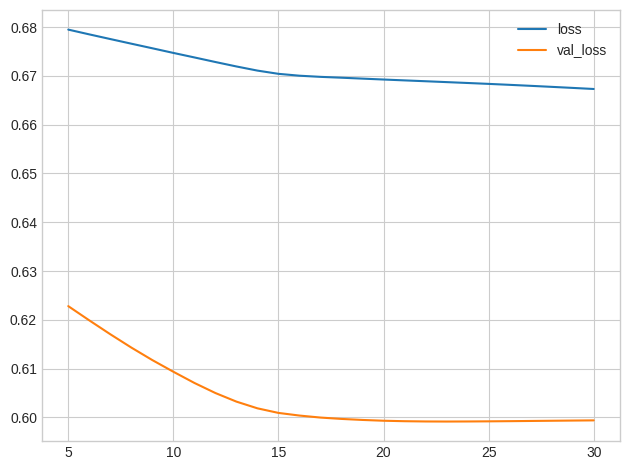

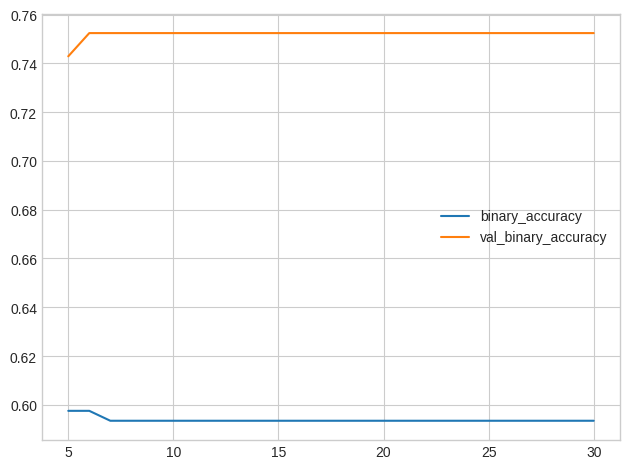

In [45]:
# check out learning curves
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))